In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Zaid\\OneDrive\\Desktop\\data analytics\\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
#univariate analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

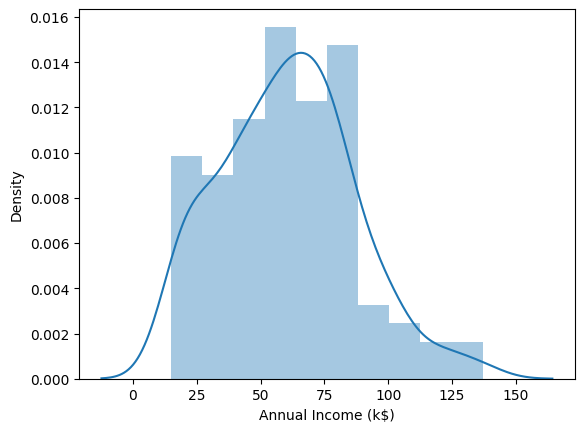

In [7]:
sns.distplot(df['Annual Income (k$)'])

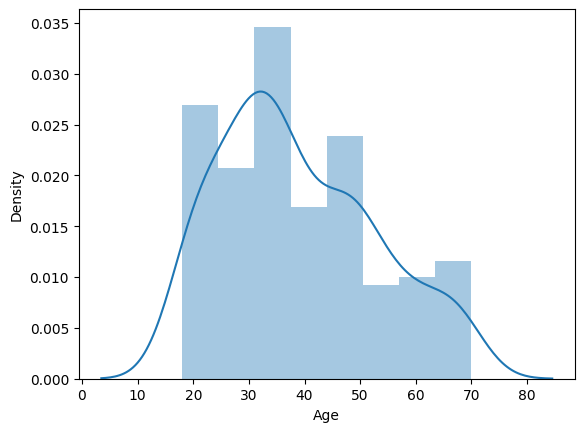

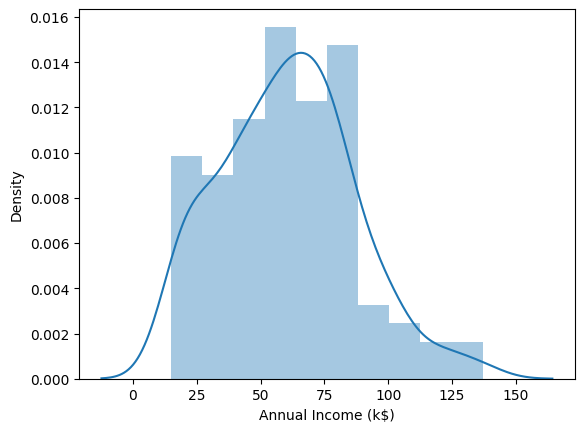

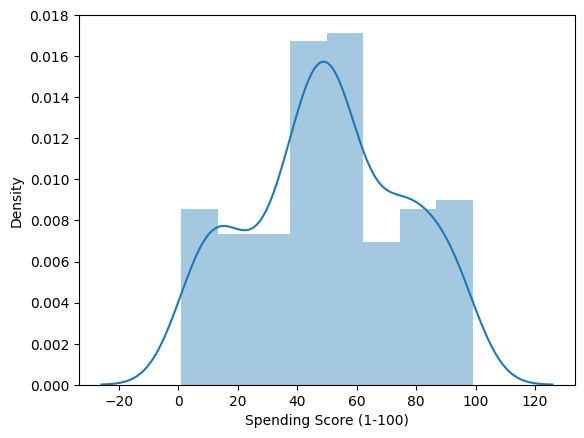

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

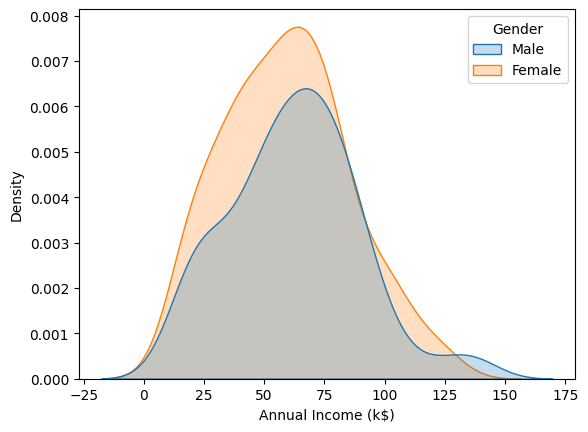

In [19]:
#sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender'])
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

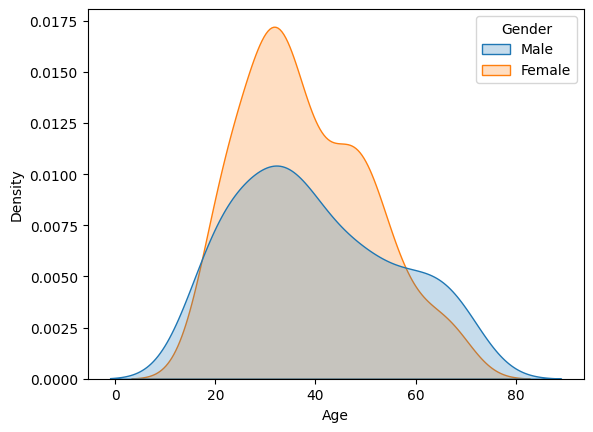

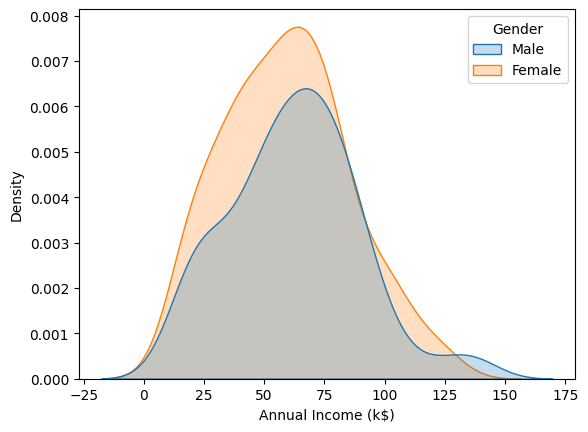

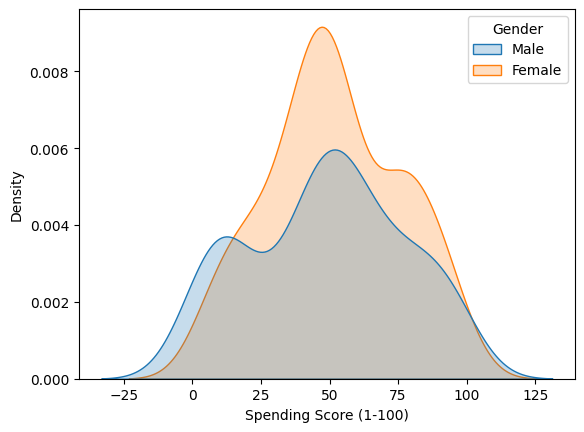

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=df[i], shade=True, hue='Gender') 

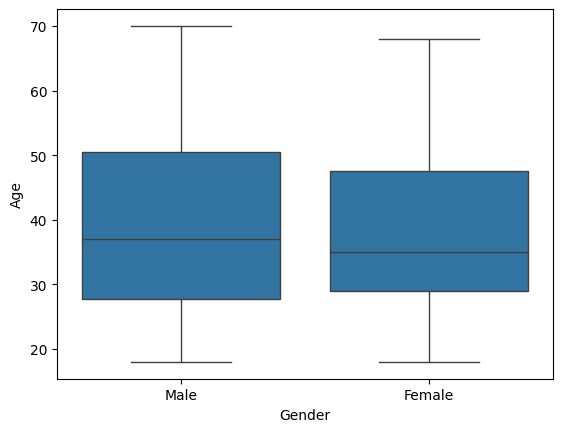

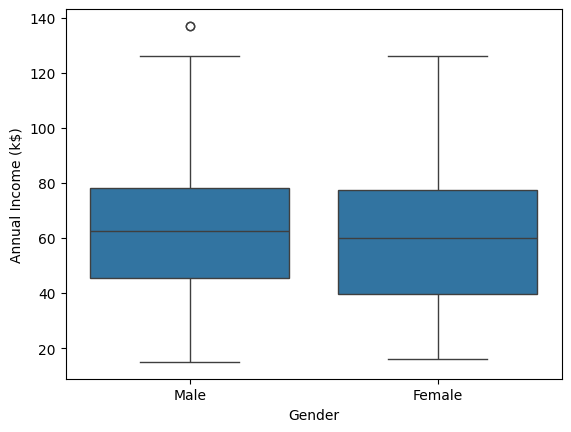

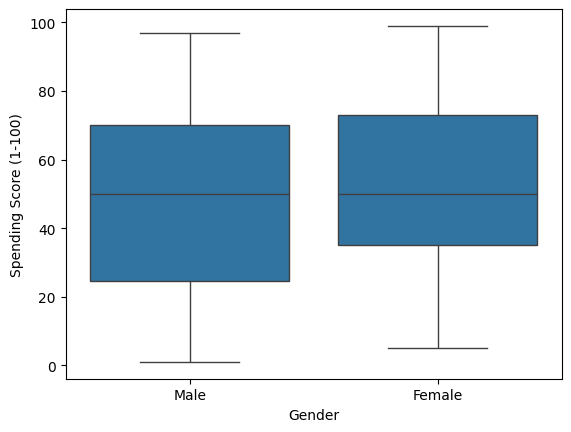

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [12]:
############# Bivariate analysis ############

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

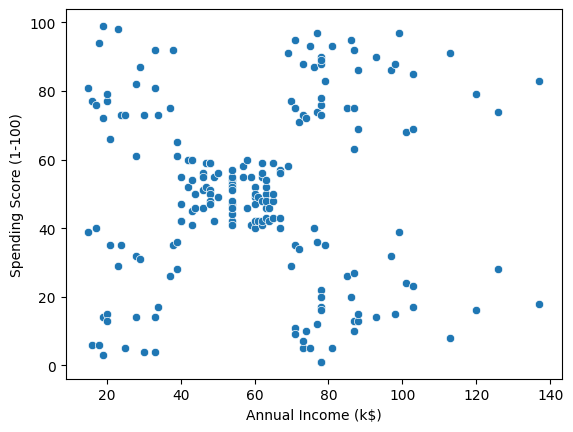

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')

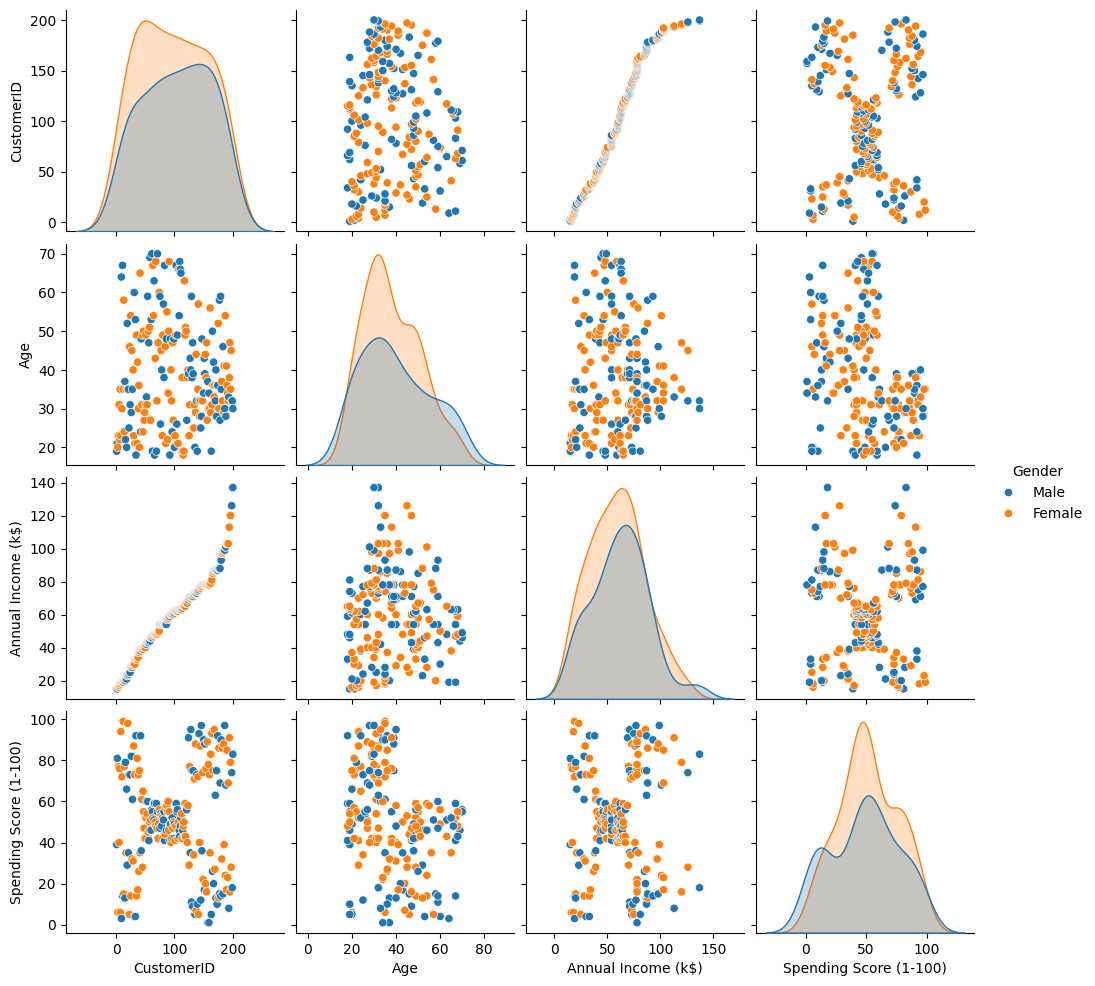

In [14]:
#df = df.drop('CustomerID',axis=1)
sns.pairplot(df,hue="Gender")

In [16]:
#df.groupby['Gender']['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df = df.select_dtypes(include=[float, int])
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

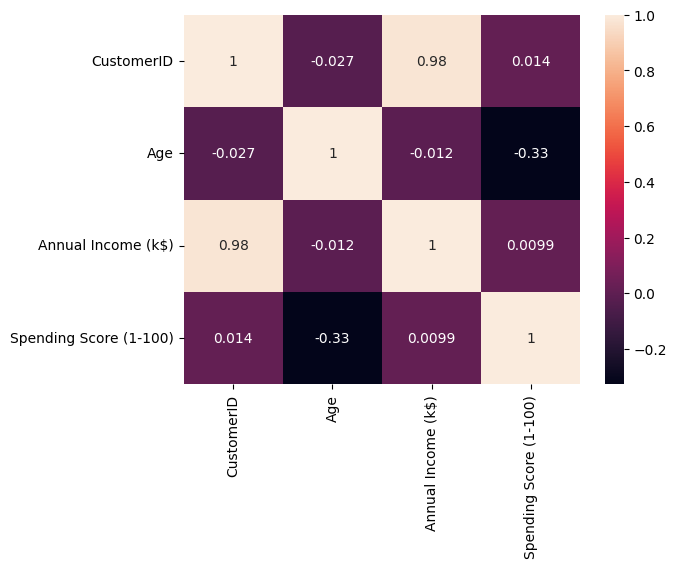

In [18]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
##### clustring---univaruate,bivariate,multivariate ####

In [19]:
clustering1 = KMeans(n_clusters=3)

In [20]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
df['income cluster'] = clustering1.labels_
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [23]:
df['income cluster'].value_counts()

income cluster
0    92
1    86
2    22
Name: count, dtype: int64

In [24]:
clustering1.inertia_

25341.285871863223

In [25]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.28000000003,
 48660.88888888888,
 25640.457784396836,
 13844.222098218705,
 9407.908188585607,
 8957.24152191894,
 4315.378947368421,
 2822.4996947496948,
 2220.6341269841273,
 1990.552139037433]

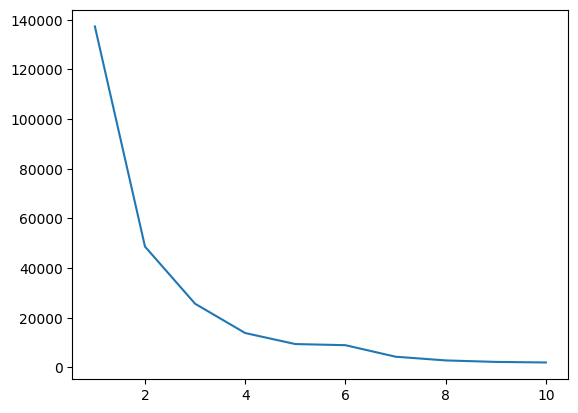

In [26]:
plt.plot(range(1,11),inertia_scores)
#elbow method to find number of clusters

In [27]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster'],
      dtype='object')

In [28]:
df.groupby('income cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,38.065217,71.804348,49.880435
1,40.023256,36.348837,50.081395
2,37.545455,108.181818,52.000000


In [ ]:
#### bivariate Analysis

In [29]:
clustering2 = KMeans(n_clusters = 5) 
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])


KMeans(n_clusters=5)

In [30]:
clustering2.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [31]:
df['spending and income cluster'] = clustering2.labels_
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,1,19,15,39,1,3
1,2,21,15,81,1,0
2,3,20,16,6,1,3
3,4,23,16,77,1,0
4,5,31,17,40,1,3


In [32]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
inertia_scores2

[269981.28,
 183714.08082173267,
 153331.1179107664,
 99094.18613053612,
 44448.45544793371,
 37558.92202302528,
 30273.394312070042,
 29032.75552567587,
 23394.883391724554,
 21330.192520431458]

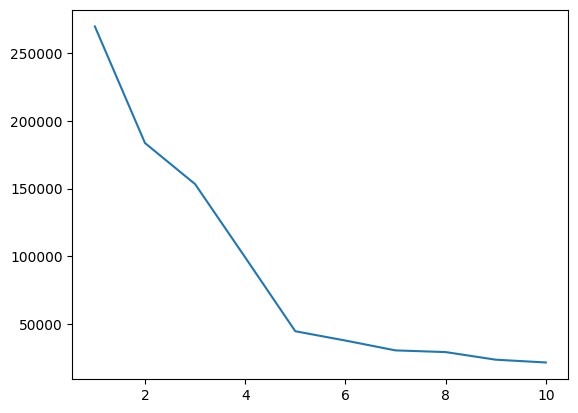

In [33]:
plt.plot(range(1,11),inertia_scores2)
#elbow mwethod to find number of clusters

In [34]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

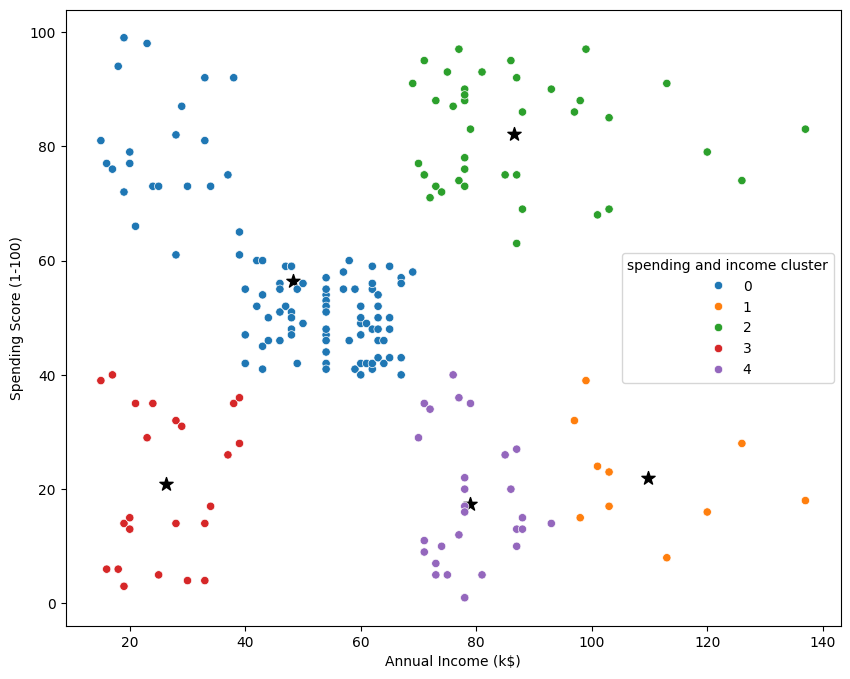

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black' , marker='*')
sns.scatterplot(data=df, x= 'Annual Income (k$)' ,y='Spending Score (1-100)', hue='spending and income cluster',palette='tab10')


In [36]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

In [49]:
#pd.crosstab(df['spending and income cluster'], df['Gender'],normalize='index')

In [38]:
df.groupby('spending and income cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending and income cluster,,,
0,39.200000,48.260000,56.480000
1,41.000000,109.700000,22.000000
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,40.178571,78.892857,17.428571


In [ ]:
##### multivariate analysis ######

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scale = StandardScaler()

In [41]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,1,19,15,39,1,3
1,2,21,15,81,1,0
2,3,20,16,6,1,3
3,4,23,16,77,1,0
4,5,31,17,40,1,3


In [42]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,1,19,15,39,1,3
1,2,21,15,81,1,0
2,3,20,16,6,1,3
3,4,23,16,77,1,0
4,5,31,17,40,1,3


In [43]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'spending and income cluster'],
      dtype='object')

In [45]:
dff= scale.fit_transform(dff)

In [46]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4,5
0,-1.723412,-1.424569,-1.738999,-0.434801,0.523205,1.092231
1,-1.706091,-1.281035,-1.738999,1.195704,0.523205,-0.887644
2,-1.688771,-1.352802,-1.700830,-1.715913,0.523205,1.092231
3,-1.671450,-1.137502,-1.700830,1.040418,0.523205,-0.887644
4,-1.654129,-0.563369,-1.662660,-0.395980,0.523205,1.092231


In [47]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
inertia_scores3


[1200.0000000000002,
 974.0796584359598,
 697.282677639744,
 553.0841768105862,
 404.0161134526895,
 273.91850644318174,
 214.56910828044835,
 183.55544732835523,
 164.56272467559555,
 136.48568806725922]

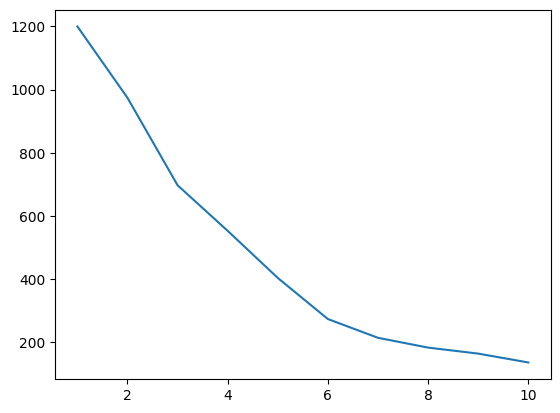

In [48]:
plt.plot(range(1,11),inertia_scores3)
#elbow mwethod to find number of clusters

In [ ]:
for savinf graph
plt.savefig("name.png")

In [ ]:
save new file
df.to_save('name.csv')